In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import random as rn

ddf = pd.read_csv("diabetes.csv")

In [12]:
print(ddf.head(10))
#Printing first 10 values of diabetes.csv

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [13]:
print(ddf.info())
#Basic information about diabetes.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [14]:
print(ddf.describe())
#Basic statistical details of diabetes.csv

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [15]:
print((ddf.describe()).T)
#Transpose of basic statistical details of diabetes.csv

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

In [16]:
ddf.loc[:, ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = ddf.replace(0, np.nan)
#Replacing '0' values in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] as np.nan

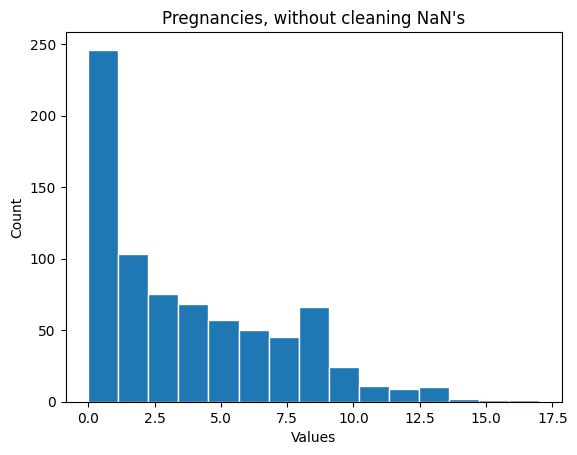

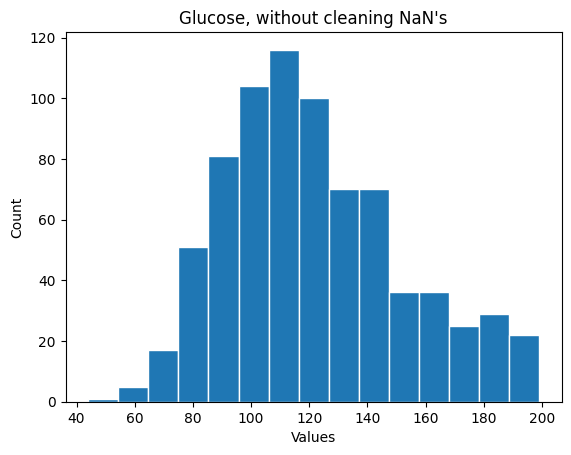

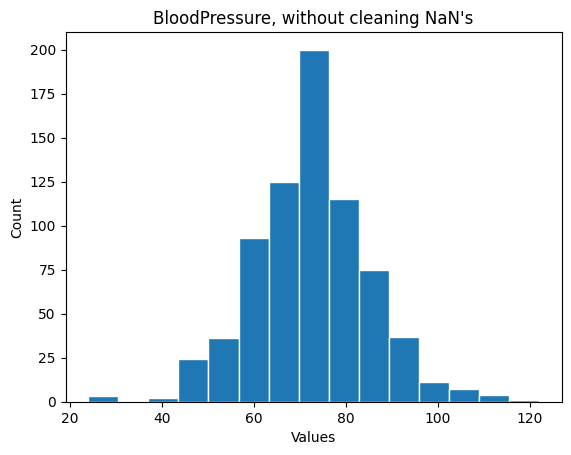

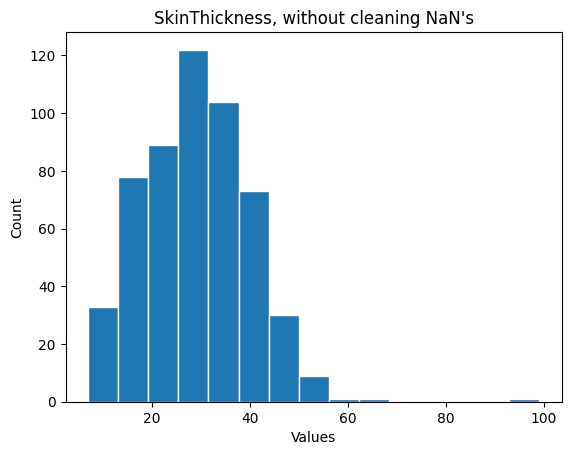

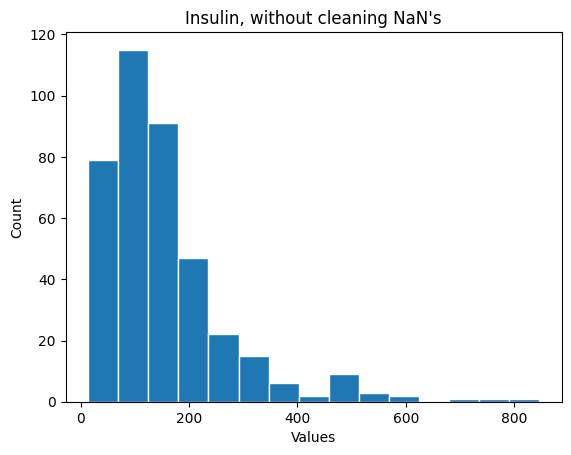

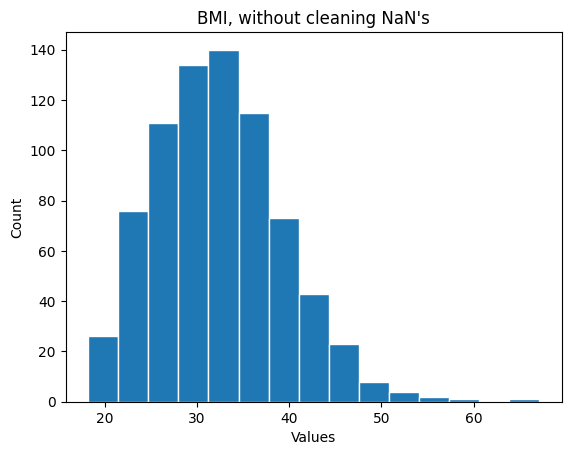

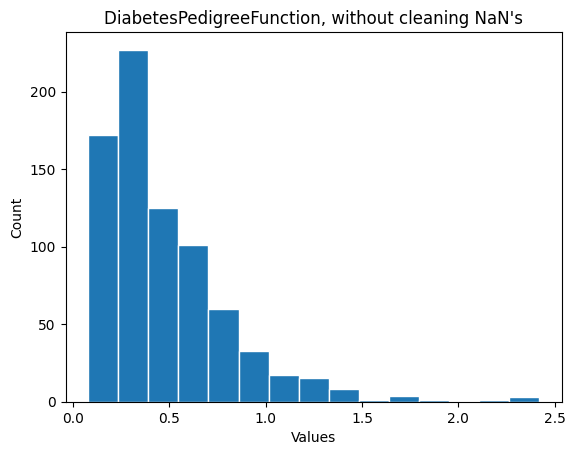

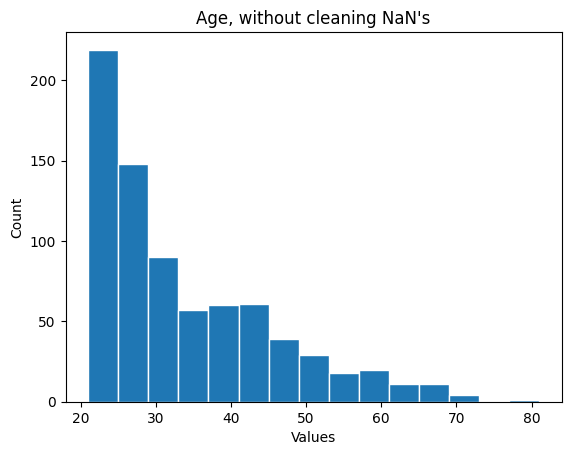

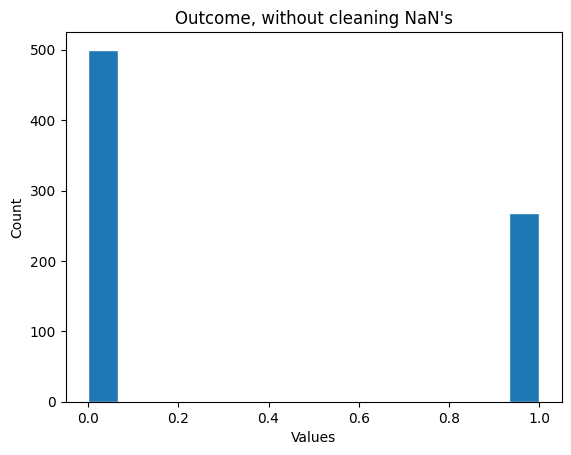

In [17]:
for i in range(len(ddf.columns)):
  pl.hist(ddf.iloc[:, i], edgecolor="white", bins=15)
  pl.title(ddf.columns[i] + ", without cleaning NaN's")
  pl.xlabel("Values")
  pl.ylabel("Count")
  pl.show()
  #Plotting ddf as a histogram graph with 25 bins

In [18]:
ddf2 = ddf.copy()
#Making a copy of ddf
for col in ddf2.columns:
  total_NA = ddf2[col].isna().sum()
  if total_NA < 50:
    ddf2[col].fillna(ddf2.mean(), inplace=True)
    # If NaN number in a column is smaller than 50 (twice of bin number) ->
    # Fill the NaN's as "mean of it's column"
  else:
    probList = ddf2[col].value_counts(normalize=True).sort_index(ascending=True)
    #Creating a variable which holds the each value and its probability in ascending order
    for j in range(len(ddf2[col])):
      if(np.isnan(ddf2.loc[j, col])):
        weight_rand = rn.choices(probList.index, weights=probList.values)
        #Picking a random number from weighted values
        ddf2.loc[j, col] = weight_rand
    # If NaN number in a column is greater than 50 (twice of bin number) ->
    # Fill the NaN "randomly with weighted values"

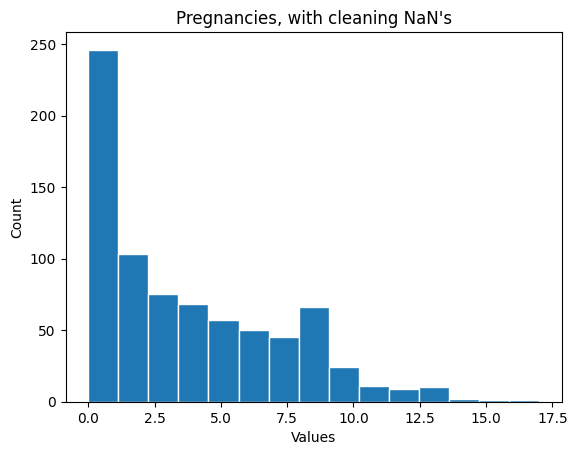

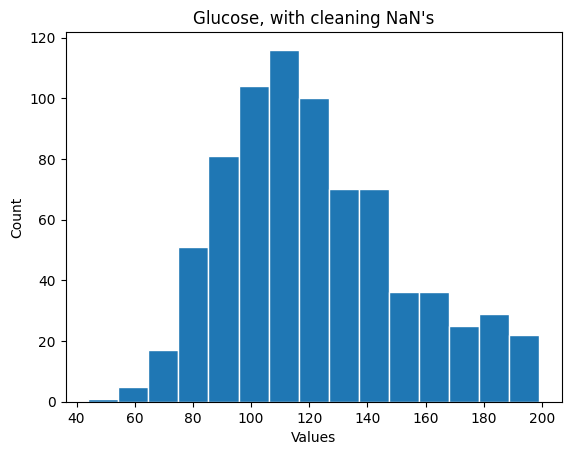

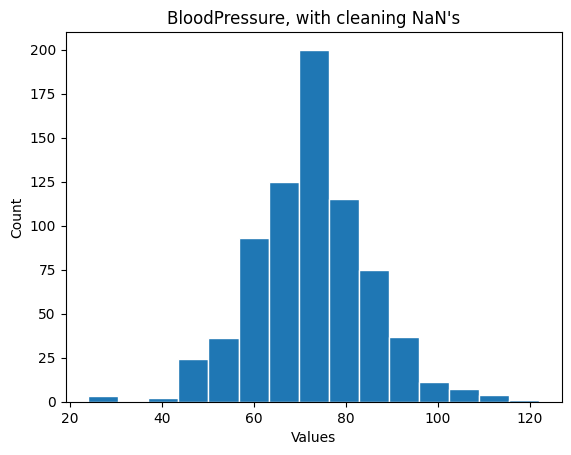

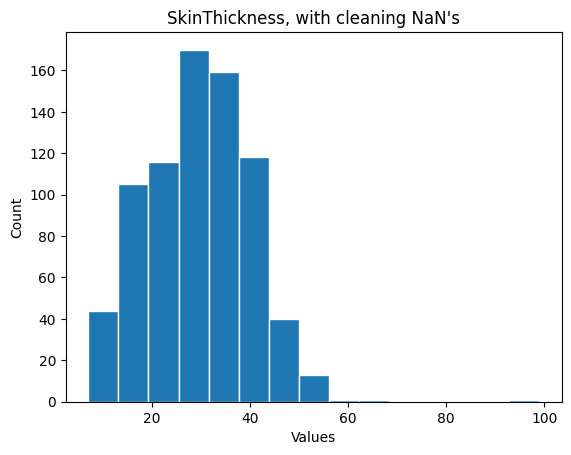

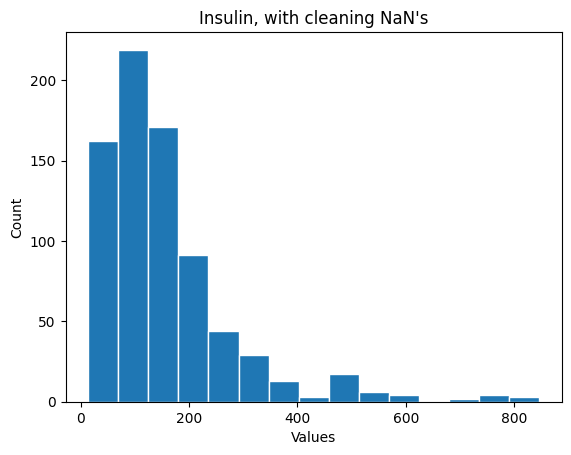

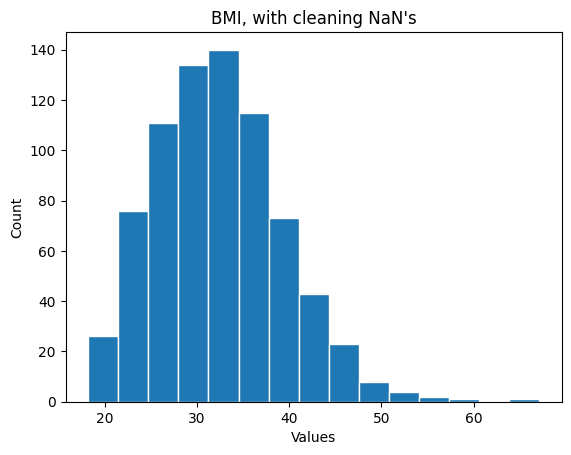

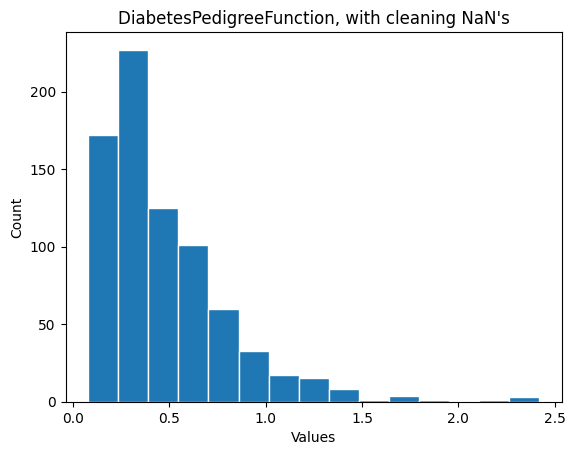

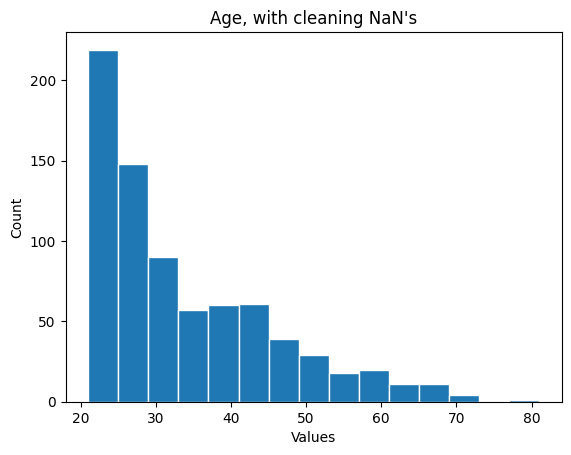

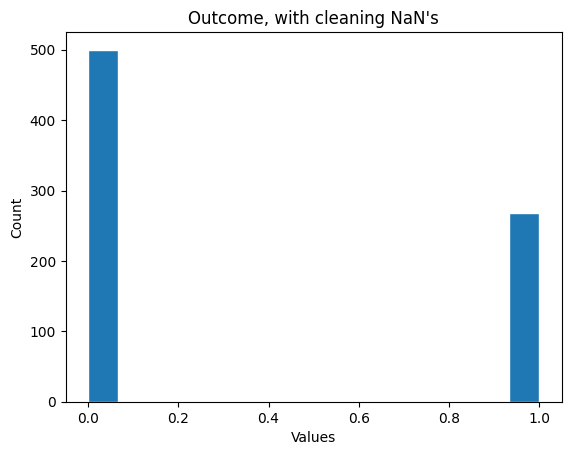

In [19]:
for i in range(len(ddf2.columns)):
  pl.hist(ddf2.iloc[:, i], edgecolor="white", bins=15)
  pl.title(ddf2.columns[i] + ", with cleaning NaN's")
  pl.xlabel("Values")
  pl.ylabel("Count")
  pl.show()
  #Plotting ddf2 as a histogram graph with 25 bins